E_0 =  138.02881241601568 eV
E_1 =  690.1440340423471 eV
E_2 =  1242.259301147003 eV
E_3 =  1518.316870980066 eV


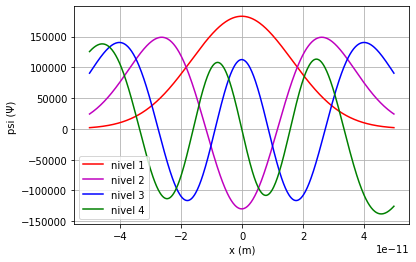

In [7]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel, grid, legend
from numpy import linspace
from scipy.integrate import odeint

# Constants
e = 1.602 * 10 ** -19
V0 = 50 * e  # J
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10
x_f =10 ** -10
psi_0 = 0.0
hbar = 1.05457 * 10 ** -34  # J*s
m = 9.10938 * 10 ** -31 # masa del electron en kg
N = 1000  # numero de pasos
h = (x_f - x_0) / N

def psi(E):
    def f(r, x):
        #potencial (0)
        #def V(x):
        #     return 0.0

        def V(x):
            return V0 * x ** 2 / a ** 2

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)

    r = array([psi_0, 1.0] ,float)
    x=linspace(-10*a,10*a,N)
    
    rsol=odeint(f,r,x)
    wavefunction = rsol[:,0]
    return array(wavefunction, float)

def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    psi2 = wavefunction[N - 1]
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
        
      #Normalizando la funcion de onda utilizando el método de simpson
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
                       4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)

#Primeros tres  niveles energía más bajos del oscilador armónico
E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
E3, psi3 = secant_root(1300*e, 1500*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')
print('E_3 = ', E3, 'eV')
xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'r', label="nivel 1")
plot(xpoints[x_range], psi1[x_range], 'm', label = "nivel 2")
plot(xpoints[x_range], psi2[x_range], 'b', label = "nivel 3")
plot(xpoints[x_range], psi3[x_range], 'g', label = "nivel 4")
xlabel('x (m)')
ylabel('psi (Ψ) ')
grid("on")
legend()
show()

la gráfica muestra el comportamiento de la funcion de onda  (psi), mostrando los tres primeros niveles de energía dados por el potencial.

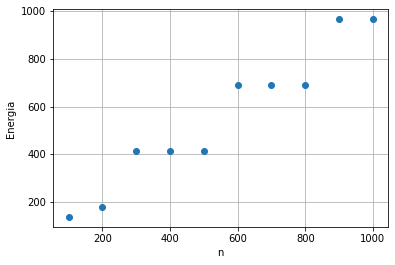

In [17]:
energia=[]
I=[]
i=0
for i in arange(0,1000,100):
    E0, psi0 = secant_root(i*e,(i+100)*e)
    i=i+100
    I.append(i)
    energia.append(E0)
plot(I,energia,'o')
xlabel('n')
ylabel('Energia ')   
grid ("on")  